In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_values = pd.read_csv('train_values.csv')

In [3]:
# predictors data
df_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_labels = pd.read_csv('train_labels.csv')

In [5]:
# class labels data
df_labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [6]:
# combine the labels and the predictors into one dataset
df = pd.merge(df_labels, df_values, left_on = 'building_id', right_on = 'building_id')

In [7]:
df.damage_grade

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [8]:
df.corr()['damage_grade'].sort_values(ascending=False)

damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.291325
count_floors_pre_eq                       0.122308
has_superstructure_stone_flag             0.066039
count_families                            0.056151
has_superstructure_adobe_mud              0.055314
height_percentage                         0.048130
geo_level_2_id                            0.043161
age                                       0.029273
has_superstructure_mud_mortar_brick       0.014561
has_secondary_use_agriculture             0.011309
geo_level_3_id                            0.007932
building_id                               0.001063
has_secondary_use_use_police             -0.001656
has_secondary_use_health_post            -0.008543
has_secondary_use_gov_office             -0.009378
has_secondary_use_industry               -0.011024
has_secondary_use_school                 -0.011692
has_secondary_use_other                  -0.016334
has_secondary_use_institution  

# Data Wrangling

In [9]:
df[['geo_level_1_id','geo_level_2_id','geo_level_3_id']] = \
    df[['geo_level_1_id','geo_level_2_id','geo_level_3_id']].astype(str)

In [10]:
y = df.damage_grade
X = df.drop(['building_id','damage_grade', 'geo_level_2_id', 'geo_level_3_id'], axis =1)

X_cat = df.drop(['damage_grade'], axis=1)

X = pd.get_dummies(X)



# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from id3 import Id3Estimator
# from id3 import export_graphviz

In [11]:
X_cat.corr()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,1.000000,-0.000654,-0.001476,-0.002070,0.000096,-0.000307,0.002423,0.001443,-0.000827,-0.003768,...,0.002631,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295
count_floors_pre_eq,-0.000654,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,-0.041058,-0.011329,0.257279,...,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073
age,-0.001476,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,0.009129,-0.012128,0.079525,...,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534
area_percentage,-0.002070,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,-0.000473,0.073701,0.053362,...,-0.016478,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111
height_percentage,0.000096,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,-0.020260,0.012960,0.209098,...,-0.005390,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397
has_superstructure_adobe_mud,-0.000307,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,0.006962,-0.014554,0.314979,...,-0.003917,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074
has_superstructure_mud_mortar_stone,0.002423,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,-0.034046,-0.104288,-0.376208,...,0.058261,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628
has_superstructure_stone_flag,0.001443,-0.041058,0.009129,-0.000473,-0.020260,0.006962,-0.034046,1.000000,0.037307,-0.033348,...,0.010563,-0.008868,-0.011632,-0.000971,-0.001362,-0.004240,-0.002586,0.002959,0.000472,0.002127
has_superstructure_cement_mortar_stone,-0.000827,-0.011329,-0.012128,0.073701,0.012960,-0.014554,-0.104288,0.037307,1.000000,-0.001692,...,-0.016117,0.072104,0.033757,0.007985,0.006473,0.006939,0.004406,0.012605,0.004825,0.014337
has_superstructure_mud_mortar_brick,-0.003768,0.257279,0.079525,0.053362,0.209098,0.314979,-0.376208,-0.033348,-0.001692,1.000000,...,-0.038678,0.025152,0.018368,-0.002334,-0.000326,0.011168,0.000733,-0.003266,-0.000920,-0.004890


In [12]:
# scaled general data
from sklearn.preprocessing import StandardScaler

X_cat_continuous = X_cat.select_dtypes(include='int64')
X_cat_continuous = X_cat_continuous.drop('building_id',axis=1)

X_cat_obj = X_cat.select_dtypes(include='object')

scaler_real = StandardScaler()
X_cat_continuous_scaled = pd.DataFrame(scaler_real.fit_transform(X_cat_continuous), columns = X_cat_continuous.columns)

dataset_scaled = X_cat_continuous_scaled.merge(X_cat_obj, left_index =True, right_index =True)
dataset_scaled

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,-0.178274,0.047100,-0.459460,-0.226419,3.206391,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,...,487,12198,t,r,n,f,q,t,d,v
1,-0.178274,-0.224765,-0.004110,0.816109,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,...,900,2812,o,r,n,x,q,s,d,v
2,-0.178274,-0.224765,-0.687135,-0.226419,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,...,363,8973,t,r,n,f,x,t,d,v
3,-0.178274,-0.224765,-0.459460,-0.226419,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,...,418,10694,t,r,n,f,x,s,d,v
4,1.195989,0.047100,-0.004110,1.858636,3.206391,-1.789003,-0.188554,-0.136284,-0.270442,-0.285298,...,131,1488,t,r,n,f,x,s,d,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,-1.552536,0.386932,-0.459460,-1.268946,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,...,1335,1621,n,r,n,f,j,s,q,v
260597,-0.178274,-0.360698,-0.459460,-0.226419,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,...,715,2060,t,r,n,f,q,s,d,v
260598,1.195989,0.386932,-0.459460,0.816109,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,...,51,8163,t,r,q,f,q,s,d,v
260599,-0.178274,-0.224765,1.361941,0.294845,-0.311877,-1.789003,-0.188554,-0.136284,-0.270442,3.505111,...,39,1851,t,r,x,v,s,j,d,v


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size=0.25, random_state=42)

In [14]:

X_train_cat = X_train_cat.reset_index()
X_test_cat = X_test_cat.reset_index()

y_train_cat = y_train_cat.reset_index()
y_test_cat = y_test_cat.reset_index()

X_train_cat = X_train_cat.drop('index',axis=1)
X_test_cat= X_test_cat.drop('index',axis=1)

X_continuous_train = X_train_cat.select_dtypes(include='int64')
X_continuous_test = X_test_cat.select_dtypes(include='int64')

X_obj_train = X_train_cat.select_dtypes(include='object')
X_obj_test = X_test_cat.select_dtypes(include='object')

scaler_tr = StandardScaler()
X_train_s = pd.DataFrame(scaler_tr.fit_transform(X_continuous_train.iloc[:,1:]), columns = X_continuous_train.iloc[:,1:].columns)
X_test_s = pd.DataFrame(scaler_tr.transform(X_continuous_test.iloc[:,1:]), columns = X_continuous_test.iloc[:,1:].columns)

X_obj_train['building_id'] = X_continuous_train['building_id']
X_obj_test['building_id'] = X_continuous_test['building_id']
X_train_s['building_id'] = X_continuous_train['building_id']
X_test_s['building_id'] = X_continuous_test['building_id']

scaled_train_1 = X_train_s.merge(X_obj_train, left_on ='building_id', right_on ='building_id')
scaled_test_1 = X_test_s.merge(X_obj_test, left_on ='building_id', right_on ='building_id')


scaled_train_1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,-0.177564,0.048849,0.451393,0.295039,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,32,5472,t,r,n,f,x,s,d,v
1,-0.177564,-0.019806,-0.002935,-0.225919,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,663,7897,t,r,n,f,q,s,d,v
2,1.195422,0.529432,-0.457263,0.295039,3.205344,-1.788771,-0.188173,-0.136148,3.698951,3.501790,...,175,6765,t,r,q,f,q,j,d,v
3,-0.177564,0.048849,-0.457263,0.295039,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,762,10530,t,r,n,f,q,s,d,v
4,-0.177564,-0.019806,-0.457263,-0.746878,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,309,8039,t,r,n,f,q,s,d,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195445,-0.177564,-0.019806,-0.457263,-0.225919,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,909,1626,t,r,q,f,x,s,d,v
195446,-0.177564,-0.294425,-0.684427,-0.746878,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,1397,8182,n,r,n,f,q,s,d,v
195447,1.195422,-0.088461,3.177362,0.815998,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,1073,5249,o,r,q,f,q,s,d,v
195448,1.195422,-0.225770,0.678557,0.815998,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,76,1841,t,r,q,f,q,s,d,v


In [15]:
scaled_train_1 = scaled_train_1.drop('building_id',axis=1)
scaled_test_1= scaled_test_1.drop('building_id',axis=1)

In [16]:
scaled_train_1

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,-0.177564,0.048849,0.451393,0.295039,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,32,5472,t,r,n,f,x,s,d,v
1,-0.177564,-0.019806,-0.002935,-0.225919,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,663,7897,t,r,n,f,q,s,d,v
2,1.195422,0.529432,-0.457263,0.295039,3.205344,-1.788771,-0.188173,-0.136148,3.698951,3.501790,...,175,6765,t,r,q,f,q,j,d,v
3,-0.177564,0.048849,-0.457263,0.295039,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,762,10530,t,r,n,f,q,s,d,v
4,-0.177564,-0.019806,-0.457263,-0.746878,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,309,8039,t,r,n,f,q,s,d,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195445,-0.177564,-0.019806,-0.457263,-0.225919,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,909,1626,t,r,q,f,x,s,d,v
195446,-0.177564,-0.294425,-0.684427,-0.746878,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,1397,8182,n,r,n,f,q,s,d,v
195447,1.195422,-0.088461,3.177362,0.815998,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,1073,5249,o,r,q,f,q,s,d,v
195448,1.195422,-0.225770,0.678557,0.815998,-0.311979,0.559043,-0.188173,-0.136148,-0.270347,-0.285568,...,76,1841,t,r,q,f,q,s,d,v


In [17]:
X_train_cat

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,184292,12,32,5472,2,30,10,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,85957,17,663,7897,2,25,8,5,t,r,...,0,0,0,0,0,0,0,0,0,0
2,227366,3,175,6765,3,65,6,6,t,r,...,0,0,0,0,0,0,0,0,0,0
3,617536,26,762,10530,2,30,6,6,t,r,...,1,0,0,0,0,0,0,0,0,0
4,406641,12,309,8039,2,25,6,4,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195445,79888,13,909,1626,2,25,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
195446,442764,10,1397,8182,2,5,5,4,n,r,...,0,0,0,0,0,0,0,0,0,0
195447,17256,8,1073,5249,3,20,22,7,o,r,...,0,1,0,0,0,0,0,0,0,0
195448,496181,10,76,1841,3,10,11,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y_train_cat = y_train_cat.drop('index', axis=1)
y_test_cat = y_test_cat.drop('index', axis=1)

In [19]:
scaled_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195450 entries, 0 to 195449
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   count_floors_pre_eq                     195450 non-null  float64
 1   age                                     195450 non-null  float64
 2   area_percentage                         195450 non-null  float64
 3   height_percentage                       195450 non-null  float64
 4   has_superstructure_adobe_mud            195450 non-null  float64
 5   has_superstructure_mud_mortar_stone     195450 non-null  float64
 6   has_superstructure_stone_flag           195450 non-null  float64
 7   has_superstructure_cement_mortar_stone  195450 non-null  float64
 8   has_superstructure_mud_mortar_brick     195450 non-null  float64
 9   has_superstructure_cement_mortar_brick  195450 non-null  float64
 10  has_superstructure_timber               1954

# Fitting Models

In [20]:
import prince
mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)
mca = mca.fit(X_train)

ZeroDivisionError: float division by zero

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


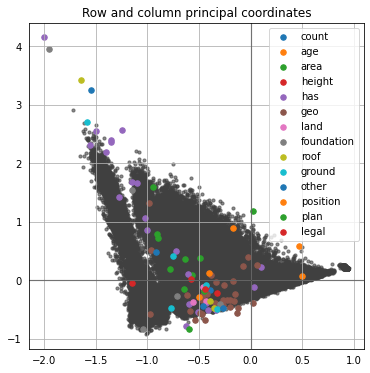

In [21]:
ax = mca.plot_coordinates(X=X_train, ax=None, figsize=(6, 6), show_row_points=True, row_points_size=10, \
        show_row_labels=False, show_column_points=True, column_points_size=30, show_column_labels=False, \
        legend_n_cols=1)
ax.get_figure()

# calibration

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

# cat_feats = [0,1,2,7,8,9,10,11,12,13,25]
cat_feats = [26,27,28,29,30,31,32,33,34,35,36]

train_dataset = Pool(data=scaled_train_1,
                     label=y_train_cat,
                     cat_features=cat_features)

eval_dataset = Pool(data=scaled_test,
                    label=y_test_cat,
                    cat_features=cat_features)


# fit base model on training dataset
model = CatBoostClassifier(iterations=900,
                           l2_leaf_reg= 1,
                           depth=9,
                           learning_rate=0.06,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')

# calibrate model on validation data
calibrator = CalibratedClassifierCV(model, cv=5)
calibrator.fit(train_dataset)
# evaluate the model
yhat = calibrator.predict(eval_dataset)

# Scaled

In [ ]:
import numpy as np

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report
# initialize data

cat_feats = [27,28,29,30,31,32,33,34,35,36,37]

train_dataset = Pool(data=scaled_train_1,
                     label=y_train_cat,
                     cat_features=cat_feats)

eval_dataset = Pool(data=scaled_test_1,
                    label=y_test_cat,
                    cat_features=cat_feats)

model = CatBoostClassifier(iterations=1000,
                           l2_leaf_reg= 1,
                           depth=9,
                           learning_rate=0.06,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
# train the model 
model.fit(train_dataset)
# make the prediction using the resulting model
preds_class = model.predict(eval_dataset)
preds_proba = model.predict_proba(eval_dataset)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, preds_class, target_names=target_names))

# Not scaled

In [ ]:
import numpy as np

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report
# initialize data

X_train_cat = X_train_cat.drop('building_id',axis=1)
X_test_cat = X_train_cat.drop('building_id',axis=1)

cat_features = [0,1,2,7,8,9,10,11,12,13,25]

train_dataset = Pool(data=X_train_cat,
                     label=y_train_cat,
                     cat_features=cat_features)

eval_dataset = Pool(data=X_test_cat,
                    label=y_test_cat,
                    cat_features=cat_features)

model = CatBoostClassifier(iterations=1000,
                           l2_leaf_reg= 1,
                           depth=9,
                           learning_rate=0.06,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')

# train the model 
model.fit(train_dataset)
# make the prediction using the resulting model
preds_class = model.predict(eval_dataset)
preds_proba = model.predict_proba(eval_dataset)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, preds_class, target_names=target_names))

In [ ]:
train_dataset = Pool(data=X_train_cat,
                     label=y_train_cat,
                     cat_features=cat_features)

eval_dataset = Pool(data=X_test_cat,
                    label=y_test_cat,
                    cat_features=cat_features)

model_search = CatBoostClassifier(loss_function='MultiClass')

grid = { 
        'l2_leaf_reg' : [1,3,6,9]
        'learning_rate' : [.06,.07,.08]
        'depth' : [7,8,9]
        'iterations' : [700,800,900]
       }

grid_search_result = model_search.grid_search(grid, train_dataset,
                                       cv=5,
                                       plot=True)

In [ ]:
grid_search_result

# Final code for submission

In [ ]:
# actual submission code
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report
# initialize data

# cat_features = [0,1,2,7,8,9,10,11,12,13,25]
cat_feats = [27,28,29,30,31,32,33,34,35,36,37]


dataset = Pool(data=dataset_scaled,
                     label=y,
                     cat_features=cat_feats)

# eval_dataset = Pool(data=X_test_cat,
#                     label=y_test_cat,
#                     cat_features=cat_feats)

model_actual = CatBoostClassifier(iterations=1000,
                           l2_leaf_reg= 1,
                           depth=9,
                           learning_rate=0.06,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
# train the model
model_actual.fit(dataset)

In [ ]:
dataset_scaled

In [ ]:
X_cat.info()

## Submission Stuff

In [ ]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')

In [ ]:
test_values = test_values[dataset_scaled.columns]
test_values = test_values.reset_index()

In [ ]:
#preprocess

test_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id']] = test_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id']].astype(str)


#scaling test vals with the same scaler as before
test_values_continuous = test_values.drop('building_id',axis=1).select_dtypes(include='int64')

test_values_obj = test_values.select_dtypes(include='object')

test_values_continuous_scaled = pd.DataFrame(scaler_real.transform(test_values_continuous), columns = test_values_continuous.columns)

test_values_scaled = test_values_continuous_scaled.merge(test_values_obj, left_index =True, right_index =True)
test_values_scaled['building_id'] = test_values['building_id']
test_values_scaled = test_values_scaled.set_index('building_id')
test_values_scaled

In [ ]:
predictions = model_actual.predict(test_values)

In [ ]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission

In [ ]:
my_submission.to_csv('submission10.csv')

In [ ]:
!head submission10.csv

submission #3: CatBoostClassifier(iterations=900,
                           l2_leaf_reg= 1,
                           depth=9,
                           learning_rate=0.08,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
                           
submission #5: CatBoostClassifier(iterations=900,
                           l2_leaf_reg= 1,
                           depth=9,
                           learning_rate=0.07,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
                           
submission #6 (.7504): CatBoostClassifier(iterations=1000,
                           l2_leaf_reg= 1,
                           depth=9,
                           learning_rate=0.06,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
                  
submission #7: CatBoostClassifier(iterations=900,
                           l2_leaf_reg= .85,
                           depth=9,
                           random_strength = 1,
                           learning_rate=0.07,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
                           
submission #8: CatBoostClassifier(iterations=1000,
                           l2_leaf_reg= .8,
                           depth=9,
                           learning_rate=0.06,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
                           
submission #9: CatBoostClassifier(iterations=1000,
                           l2_leaf_reg= .9,
                           depth=9,
                           learning_rate=0.06,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
                           
submission #10 (scaled): CatBoostClassifier(iterations=1000,
                           l2_leaf_reg= 1,
                           depth=9,
                           learning_rate=0.06,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')

# Shap visuals

In [ ]:
#Feature importances
from catboost import CatBoostClassifier, Pool
feature_importances = model.get_feature_importance(data=dataset,
                       prettified=False,
                       thread_count=-1,
                       verbose=False)


In [ ]:
feat_import_df = pd.Series(feature_importances, index = X_train_cat.columns).sort_values(ascending = False)
feat_import_df[:20].plot.bar()

In [ ]:
feat_import_df[-5:].plot.bar()

In [ ]:
X_train_cat.shape

In [ ]:
import shap
shap.initjs()

explainer = shap.Explainer(model, X_train_cat)
shap_values = explainer(X_train_cat)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.bar_plot(shap_values, features=None, feature_names=None, max_display=None, show=True)

## Confusion Matrix

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_cat, preds_class[:,0])


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_cat['damage_grade'], preds_class[:,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Damage Grade 1', 'Damage Grade 2', 'Damage Grade 3'],
                      title='Damage Grade Confusion Matrix')

In [ ]:
y_test_cat['damage_grade'].shape

In [ ]:
preds_class[:,0].shape

## Tree of model

In [ ]:
model_actual.plot_tree(
    tree_idx=999)

# Other models

In [ ]:
import pandas as pd
import numpy as np

# estimator = Id3Estimator(prune=True, min_samples_split=100)
# model = estimator.fit(X_train, y_train)
# #export_graphviz(estimator.tree_, 'tree.dot', X.columns)

# pred = model.predict(X_test)

from sklearn.metrics import classification_report

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train_fa, y_train).transform(X_train_fa)

clf_pred = clf_lda.predict(X_test_fa)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, clf_pred, target_names=target_names))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_xgb = GradientBoostingClassifier(random_state=42)

clf_xgb.fit(X_train_fa, y_train)

clf_pred = clf_xgb.predict(X_test_fa)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, clf_pred, target_names=target_names))

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.calibration import CalibratedClassifierCV

clf_logreg = LogisticRegression(random_state=42, max_iter=5000,C = 0.001)

calibrator = CalibratedClassifierCV(clf_logreg, method ='isotonic', cv=10)
calibrator.fit(X_train_fa, y_train)
# evaluate the model
yhat = calibrator.predict(X_test_fa)

#clf_pred = clf_logreg.predict(X_test_s)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, yhat, target_names=target_names))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42, min_samples_split=100)
#clf_rf.fit(X_train_s, y_train)
#clf_pred = clf_rf.predict(X_test_s)

calibrator = CalibratedClassifierCV(clf_rf, cv=5)
calibrator.fit(X_train_fa, y_train)
# evaluate the model
yhat = calibrator.predict(X_test_fa)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, yhat, target_names=target_names))

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(random_state=1, max_iter=300,
                       learning_rate = 'adaptive',
                       ).fit(X_train_s, y_train)

clf_pred = clf_mlp.predict(X_test_s)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, clf_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('LDA', clf_lda), ('mlp', clf_mlp), ('RF', clf_rf)], voting='soft')
voting_clf.fit(X_train_s, y_train)
preds = voting_clf.predict(X_test_s)
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, average='micro')

print("Accuracy is: " + str(acc))
print("F1 Score is: " + str(f1))

# Exploratory Analysis

In [ ]:
mask = (df['age']>500)

df.age[mask].hist()

In [ ]:
import seaborn as sns

geo_level = df[['damage_grade','geo_level_1_id','geo_level_2_id','geo_level_3_id']]

sns.pairplot(geo_level)

In [ ]:
building_spec = df[['age','count_floors_pre_eq','height_percentage', 'foundation_type','roof_type']]

sns.pairplot(building_spec)

In [ ]:
plt.bar(df.foundation_type, df.age)

# ID3 Model

In [ ]:
y = df.damage_grade
X = df.drop(['building_id','damage_grade'], axis=1)
X = pd.get_dummies(X, drop_first=True)

In [ ]:
spatial_X = X[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]

def series_to_string(s):
    return str(s)

spatial_X = spatial_X.applymap(series_to_string)

new_X = pd.get_dummies(spatial_X)

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.9, random_state=42)

In [ ]:
estimator = Id3Estimator(max_depth = 100)
model = estimator.fit(X_train, y_train)
#export_graphviz(estimator.tree_, 'tree.dot', X.columns)

In [ ]:
pred = model.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_train, pred, target_names=target_names))